# Load Required Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Load Input Data in Appropriate Format

In [2]:
def get_data(file_name):
    data = pd.read_csv(file_name)
    print(data.tail())
    x_parameter = []
    y_parameter = []
    for single_square_feet ,single_price_value in zip(data['square_feet'],data['price']):
        x_parameter.append([float(single_square_feet)])
        y_parameter.append(float(single_price_value))
    return x_parameter,y_parameter

In [3]:
x,y = get_data('file1.csv')
print(x)
print(y)

   square_feet  price
2          250   8450
3          300   9450
4          350  11450
5          400  15450
6          600  18450
[[150.0], [200.0], [250.0], [300.0], [350.0], [400.0], [600.0]]
[6450.0, 7450.0, 8450.0, 9450.0, 11450.0, 15450.0, 18450.0]


# Modeling Linear Regression

In [4]:
# Predicting Housing Prices using Housing Area
def linear_model_main(X_parameters,Y_parameters,predict_value):
    regr = linear_model.LinearRegression()
    r = regr.fit(X_parameters, Y_parameters)
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_
    predictions['coefficient'] = regr.coef_
    predictions['predicted_value'] = predict_outcome
    return predictions

In [5]:
predict_value = 700
result = linear_model_main(x,y,predict_value)
print("Intercept value " , result['intercept'])
print("coefficient" , result['coefficient'])
print("Predicted value: ",result['predicted_value'])

Intercept value  1771.80851064
coefficient [ 28.77659574]
Predicted value:  [ 21915.42553191]


# Summary of the Model

In [6]:
X = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     577.5
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           3.41e-07
Time:                        21:55:29   Log-Likelihood:                -59.519
No. Observations:                   7   AIC:                             121.0
Df Residuals:                       6   BIC:                             121.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            33.4257      1.391     24.030      0.000        30.022    36.829
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.056
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.280
Skew:                           0.007   Prob(JB):                        0.869
Kurtosis:                       2.021   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plotting the Result

In [7]:
def show_linear_line(X_parameters,Y_parameters):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    plt.scatter(X_parameters,Y_parameters,color='blue')
    plt.plot(X_parameters,regr.predict(X_parameters),color='red',linewidth=4)
    plt.xticks(())
    plt.yticks(())
    plt.show()

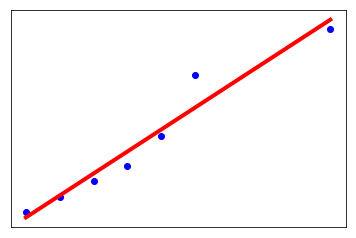

In [8]:
show_linear_line(x,y)